In [1]:
import numpy as np
import pandas as pd
from math import pi
from pathlib import Path

from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "WW All Contaminants 0.26-min"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
setup = xls_setup.to_dict()["Unnamed: 1"]

xls_setup

,Unnamed: 1
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold's Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.260000
Flow Rate (mL/s),0.028000


In [4]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=11, nrows=1, usecols="D:J")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
xls_influent

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
Unnamed: 3,,,,,,
Influent 1,432,398,398,224,263,163


In [5]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:Q")
xls_btc.rename(columns=lambda x: x.strip(), inplace=True)
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1,172.363636,284.4,646.363636,2844.000000,2.90,0.006713,7.50,0.018844,2.75,0.006887,8.80,0.039181,2.25,0.008554,32.70,0.199451
1,2,517.090909,853.2,1939.090909,8532.000000,4.70,0.010880,24.05,0.060427,2.60,0.006511,58.35,0.259795,8.20,0.031173,163.15,0.995120
2,4,1208.727273,1994.4,4532.727273,19944.000000,11.30,0.026157,106.00,0.266332,4.50,0.011270,173.10,0.770703,32.85,0.124881,187.05,1.140897
3,5,1802.181818,2973.6,6758.181818,29736.000000,20.40,0.047222,216.40,0.543719,3.80,0.009517,228.15,1.015806,60.10,0.228474,177.75,1.084172
4,6,2500.363636,4125.6,9376.363636,41256.000000,29.90,0.069213,260.05,0.653392,15.65,0.039194,258.80,1.152271,97.35,0.370082,170.15,1.037816
5,7,3496.727273,5769.6,13112.727273,57696.000000,52.45,0.121412,344.05,0.864447,16.05,0.040195,249.95,1.112867,132.90,0.505227,162.15,0.989021
6,8,4290.363636,7079.1,16088.863636,70791.000000,64.00,0.148148,360.80,0.906533,21.75,0.054470,250.45,1.115093,157.05,0.597035,157.15,0.958524
7,9,5381.272727,8879.1,20179.772727,93464.210526,67.95,0.157292,354.15,0.889824,17.75,0.044453,228.80,1.018700,151.05,0.574225,370.60,1.219079
8,10,6444.909091,10634.1,24168.409091,111937.894737,112.60,0.260648,399.90,1.004774,43.05,0.107814,235.75,1.049644,189.40,0.720015,299.80,0.986184
9,11,7175.515152,11839.6,26908.181818,124627.368421,147.50,0.341435,410.70,1.031910,81.80,0.204859,230.60,1.026714,202.00,0.767915,304.20,1.000658


In [6]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

In [7]:
contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]
molecular_weight = {"PFBA": 214.04, "BEZ": 361.8, "PFHxA": 314.05, "DCF": 296.1, "PFOA": 414.1, "PFHxS": 400.11}

c_0 = xls_influent.mean(axis="index")[contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Initial concentrations [nM]:
  PFBA: 0.762
   BEZ: 0.619
 PFHxA: 1.267
   DCF: 0.888
  PFOA: 1.043
 PFHxS: 0.995


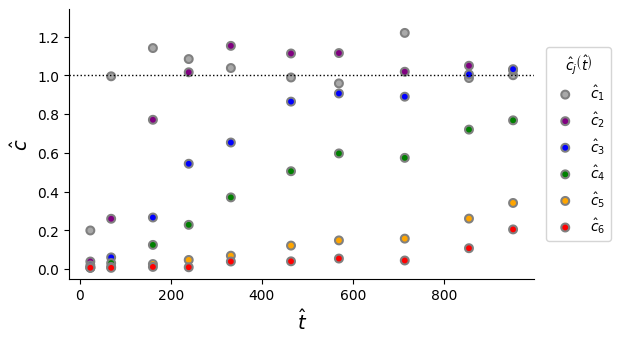

In [8]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

In [9]:
c_0

array([0.7615399 , 0.61912659, 1.26731412, 0.88821344, 1.04322627,
       0.99472645])

In [10]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=2.6e3,  # nmol/cm³
    k_ads=(50, 25, 20, 25, 52, 60),  # 1/min
    k_des=(2, 0.4, 0.05, 0.022, 0.015, 0.01),  # 1/min
    C_0=c_0,
)

p

PhysicalParams(L=1.28, v=9.645754126781533, n=0.5, sm=2600.0, k_ads=array([50, 25, 20, 25, 52, 60]), k_des=array([2.   , 0.4  , 0.05 , 0.022, 0.015, 0.01 ]), C_0=array([0.7615399 , 0.61912659, 1.26731412, 0.88821344, 1.04322627,
       0.99472645]))

In [11]:
p.nondim

{'Dam_ads': array([6.63504368, 3.31752184, 2.65401747, 3.31752184, 6.90044543,
        7.96205242]),
 'Dam_des': array([0.26540175, 0.05308035, 0.00663504, 0.00291942, 0.00199051,
        0.00132701]),
 'kappa': array([0.00014645, 0.00011906, 0.00024371, 0.00017081, 0.00020062,
        0.00019129]),
 'bc': array([1., 1., 1., 1., 1., 1.])}

Finished _timed_solve() in 4.9887 secs


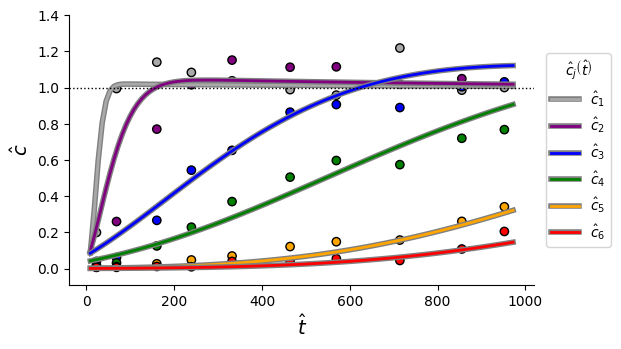

In [12]:
sim = Simulation(**p.nondim)
sim.end_time = 980  # Pore volumes
sim.write_every = 1000
sim.cfl = 0.9
sim._timed_solve()

display(plot_btc_and_data(sim, experimental_data))

Finished _timed_solve() in 1.1223 secs


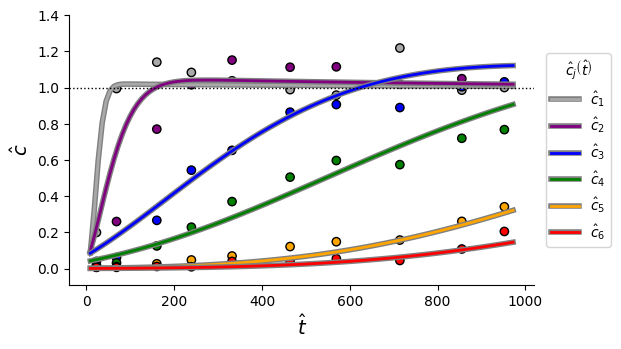

In [13]:
sim = Simulation(**p.nondim)
sim.end_time = 980  # Pore volumes
sim.write_every = 1000
sim.cfl = 0.9
sim._timed_solve()

display(plot_btc_and_data(sim, experimental_data))

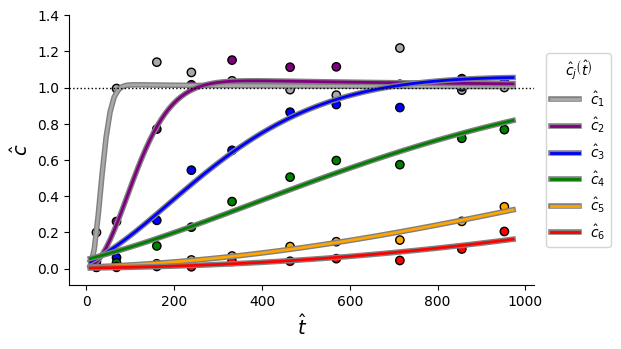

In [14]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    3.705345e00,
    1.887071e00,
    1.685240e00,
    1.436330e00,
    1.359376e00,
    1.576151e00,
    1.665684e00,
    3.272786e-01,
    -4.030993e-01,
    -1.094597e00,
    -1.564712e00,
    -1.785850e00,
    -1.878034e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 980
sim.write_every = 1000
sim.cfl = 0.9
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [15]:
display(p)

PhysicalParams(L=1.28, v=9.645754126781533, n=0.5, sm=5073.9361757772085, k_ads=array([77.10295094, 48.44400051, 27.31052193, 22.87578468, 37.6834798 ,
       46.31098306]), k_des=array([2.12460696, 0.39527623, 0.08042721, 0.02724507, 0.01637382,
       0.01324238]), C_0=array([0.7615399 , 0.61912659, 1.26731412, 0.88821344, 1.04322627,
       0.99472645]))

In [16]:
for k, v in p.nondim.items():
    print(f"{k}: {', '.join(map(lambda x: f'{x:.3E}', v))}")

Dam_ads: 1.023E+01, 6.429E+00, 3.624E+00, 3.036E+00, 5.001E+00, 6.146E+00
Dam_des: 2.819E-01, 5.245E-02, 1.067E-02, 3.615E-03, 2.173E-03, 1.757E-03
kappa: 7.504E-05, 6.101E-05, 1.249E-04, 8.753E-05, 1.028E-04, 9.802E-05
bc: 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00


In [17]:
len(sim.btc[0])

108